In [1]:


DRUG_1 = "MILADEMETAN (BRD:BRD-K00003406-001-01-9)"
DRUG_2 = "IDASANUTLIN (BRD:BRD-K62627508-001-01-5)"
DRUG_3 = "SAR405838 (BRD:BRD-A16035238-001-01-7)"
DRUG_4 = "CGM097 (BRD:BRD-K79584249-001-01-3)"
DRUG_5 = "AMG-232 (BRD:BRD-K64925568-001-01-8)"
DRUG_6 = "RG7112 (BRD:BRD-A78210457-001-01-5)"
TARGET_DRUG = DRUG_2

In [2]:
from project_code.python_scripts.urls import download_google_drive_url, DEPMAP_MUTATION_DATA, PRISM_DRUG_REPURPOSING
import pandas as pd
lof_path = download_google_drive_url(DEPMAP_MUTATION_DATA)
prism_path = download_google_drive_url(PRISM_DRUG_REPURPOSING)

lof_df = pd.read_csv(lof_path)
prism_df = pd.read_csv(prism_path)

File already exists at /home/sara-meira-and-efraim/workspace/bioinformatics_analysis/data/26a6842aa339d25d5e14e8ed8c24683c.csv
File already exists at /home/sara-meira-and-efraim/workspace/bioinformatics_analysis/data/550cdc5a977b8a5c9501d02e0bf57c09.csv


In [3]:
lof_df = lof_df.rename(columns={'Unnamed: 0': 'cell_line'})
prism_df = prism_df.rename(columns={'Unnamed: 0': 'cell_line'})
cell_lines = prism_df['cell_line'].tolist()
available_cell_lines = list(set(cell_lines) & set(lof_df['cell_line'].tolist()))
len(available_cell_lines)
lof_df = lof_df[lof_df['cell_line'].isin(available_cell_lines)]
prism_df = prism_df[prism_df['cell_line'].isin(available_cell_lines)]

In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume df is your DataFrame, excluding non-numeric columns like 'cell_line'
df_numeric = prism_df.select_dtypes(include='number')

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
scaled_array = scaler.fit_transform(df_numeric)

# Convert back to DataFrame with original column names
prism_df_scaled = pd.DataFrame(scaled_array, columns=df_numeric.columns, index=prism_df.index)
prism_df_scaled = pd.concat([prism_df['cell_line'], prism_df_scaled], axis=1)
prism_df


,cell_line,ARV-825 (BRD:BRD-A00047421-001-01-7),RS-0481 (BRD:BRD-A00055058-001-01-0),8-BROMO-CGMP (BRD:BRD-A00077618-236-07-6),DOCUSATE (BRD:BRD-A00092689-236-04-9),NIFURTIMOX (BRD:BRD-A00100033-001-08-9),BALAGLITAZONE (BRD:BRD-A00147595-001-01-5),FLUTRIMAZOLE (BRD:BRD-A00218260-001-03-4),KBG (BRD:BRD-A00376169-001-01-6),OTENZEPAD (BRD:BRD-A00520476-001-07-4),...,TALC (BRD:BRD-M92352362-002-02-3),EFONIDIPINE-MONOETHANOLATE (BRD:BRD-M92675308-003-07-1),LASOFOXIFENE (BRD:BRD-M93148412-001-02-6),DICHLOROACETATE (BRD:BRD-M97302542-001-03-6),CEVIMELINE (BRD:BRD-M98279124-300-01-1),COLESEVALAM (BRD:BRD-U08520523-000-01-0),TYLOXAPOL (BRD:BRD-U25960968-000-01-9),SEVELAMER (BRD:BRD-U45393375-000-01-6),TYLOXAPOL (BRD:BRD-U48018661-000-01-9),PHOSPHATIDYLCHOLINE (BRD:BRD-U51753822-000-01-1)
0,ACH-000001,-1.207281,0.515743,-0.015577,-0.395123,-0.449332,0.489379,0.206675,0.27273,0.021036,...,-0.856546,0.266364,-0.435815,-0.148373,-0.308255,0.125641,-0.067407,0.448387,-0.194616,-0.200107
1,ACH-000002,-4.231563,NaN,NaN,-0.538376,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.535864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACH-000004,-3.860672,NaN,NaN,0.306971,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.787437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACH-000005,-2.271411,NaN,NaN,0.035096,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.180988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACH-000006,0.277833,NaN,NaN,-0.124899,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.651824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,ACH-002039,-2.314389,NaN,NaN,0.202935,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.295103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,ACH-002041,-2.805922,NaN,NaN,-0.335913,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.343104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,ACH-002042,-2.332483,NaN,NaN,-0.334916,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.886113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,ACH-002046,-3.441262,NaN,NaN,-0.343913,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.508481,NaN,NaN,NaN,NaN,NaN,NaN,NaN


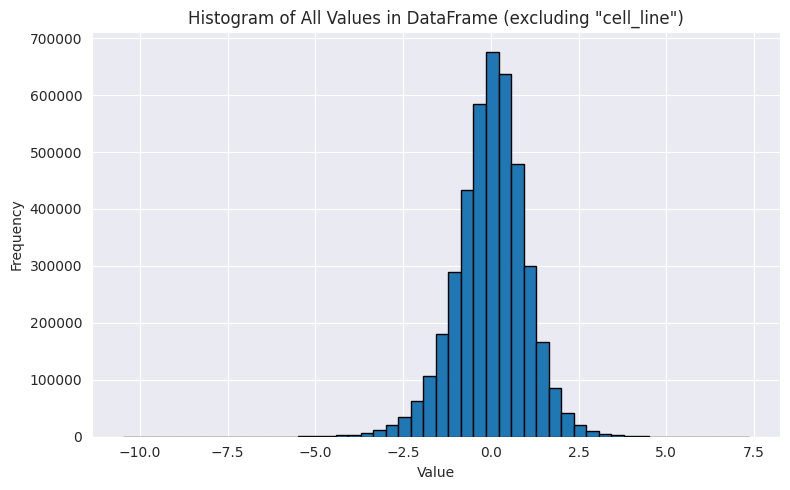

In [5]:
from matplotlib import pyplot as plt

# Drop 'cell_line' and flatten all values into a single array
all_values = prism_df_scaled.drop(columns='cell_line').select_dtypes(include='number').values.flatten()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(all_values, bins=50, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of All Values in DataFrame (excluding "cell_line")')
plt.tight_layout()
plt.show()

In [6]:
prism_df_scaled

,cell_line,ARV-825 (BRD:BRD-A00047421-001-01-7),RS-0481 (BRD:BRD-A00055058-001-01-0),8-BROMO-CGMP (BRD:BRD-A00077618-236-07-6),DOCUSATE (BRD:BRD-A00092689-236-04-9),NIFURTIMOX (BRD:BRD-A00100033-001-08-9),BALAGLITAZONE (BRD:BRD-A00147595-001-01-5),FLUTRIMAZOLE (BRD:BRD-A00218260-001-03-4),KBG (BRD:BRD-A00376169-001-01-6),OTENZEPAD (BRD:BRD-A00520476-001-07-4),...,TALC (BRD:BRD-M92352362-002-02-3),EFONIDIPINE-MONOETHANOLATE (BRD:BRD-M92675308-003-07-1),LASOFOXIFENE (BRD:BRD-M93148412-001-02-6),DICHLOROACETATE (BRD:BRD-M97302542-001-03-6),CEVIMELINE (BRD:BRD-M98279124-300-01-1),COLESEVALAM (BRD:BRD-U08520523-000-01-0),TYLOXAPOL (BRD:BRD-U25960968-000-01-9),SEVELAMER (BRD:BRD-U45393375-000-01-6),TYLOXAPOL (BRD:BRD-U48018661-000-01-9),PHOSPHATIDYLCHOLINE (BRD:BRD-U51753822-000-01-1)
0,ACH-000001,0.728129,1.748496,-0.020073,-0.628819,-0.611994,1.016787,-0.103252,1.266277,-0.672497,...,-1.099957,0.033276,-0.000160,0.486545,-1.503246,0.816827,0.413258,0.763564,-0.446253,-0.22753
1,ACH-000002,-1.229631,NaN,NaN,-0.957061,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.428439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACH-000004,-0.989536,NaN,NaN,0.979920,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.517129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACH-000005,0.039268,NaN,NaN,0.356960,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.906688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACH-000006,1.689513,NaN,NaN,-0.009644,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.069166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,ACH-002039,0.011446,NaN,NaN,0.741536,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.074463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,ACH-002041,-0.306747,NaN,NaN,-0.493149,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.136147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,ACH-002042,-0.000267,NaN,NaN,-0.490865,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.662205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,ACH-002046,-0.718032,NaN,NaN,-0.511481,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.106997,NaN,NaN,NaN,NaN,NaN,NaN,NaN


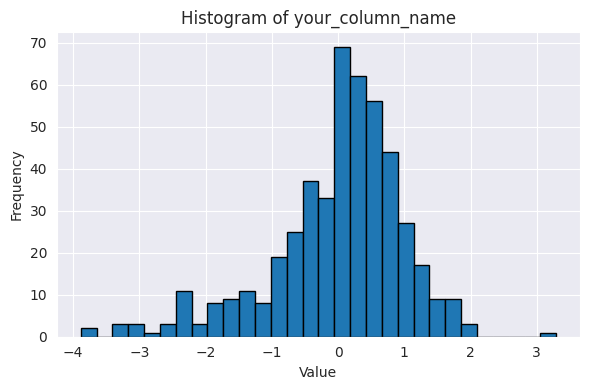

In [22]:
import matplotlib.pyplot as plt
prism_df_scaled["GSK 690693 (BRD:BRD-K25325018-001-05-6)"]
# Replace 'your_column_name' with the actual column name
plt.figure(figsize=(6, 4))
plt.hist(prism_df_scaled["GSK 690693 (BRD:BRD-K25325018-001-05-6)"], bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of your_column_name')
plt.tight_layout()
plt.show()

In [32]:
prism_df_scaled["GSK 690693 (BRD:BRD-K25325018-001-05-6)"].isna().sum()



np.int64(473)

In [7]:
# Separate "cell_line" and numeric data
import numpy as np
cell_line_col = prism_df_scaled[['cell_line']]
numeric_df = prism_df_scaled.drop(columns='cell_line').select_dtypes(include='number')

# Apply rounding down to nearest 0.5
rounded_df = np.floor(numeric_df / 0.5) * 0.5

# Combine back with "cell_line"
rounded_df = pd.concat([cell_line_col, rounded_df], axis=1)
rounded_df


,cell_line,ARV-825 (BRD:BRD-A00047421-001-01-7),RS-0481 (BRD:BRD-A00055058-001-01-0),8-BROMO-CGMP (BRD:BRD-A00077618-236-07-6),DOCUSATE (BRD:BRD-A00092689-236-04-9),NIFURTIMOX (BRD:BRD-A00100033-001-08-9),BALAGLITAZONE (BRD:BRD-A00147595-001-01-5),FLUTRIMAZOLE (BRD:BRD-A00218260-001-03-4),KBG (BRD:BRD-A00376169-001-01-6),OTENZEPAD (BRD:BRD-A00520476-001-07-4),...,TALC (BRD:BRD-M92352362-002-02-3),EFONIDIPINE-MONOETHANOLATE (BRD:BRD-M92675308-003-07-1),LASOFOXIFENE (BRD:BRD-M93148412-001-02-6),DICHLOROACETATE (BRD:BRD-M97302542-001-03-6),CEVIMELINE (BRD:BRD-M98279124-300-01-1),COLESEVALAM (BRD:BRD-U08520523-000-01-0),TYLOXAPOL (BRD:BRD-U25960968-000-01-9),SEVELAMER (BRD:BRD-U45393375-000-01-6),TYLOXAPOL (BRD:BRD-U48018661-000-01-9),PHOSPHATIDYLCHOLINE (BRD:BRD-U51753822-000-01-1)
0,ACH-000001,0.5,1.5,-0.5,-1.0,-1.0,1.0,-0.5,1.0,-1.0,...,-1.5,0.0,-0.5,0.0,-2.0,0.5,0.0,0.5,-0.5,-0.5
1,ACH-000002,-1.5,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACH-000004,-1.0,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACH-000005,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACH-000006,1.5,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,ACH-002039,0.0,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,ACH-002041,-0.5,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,ACH-002042,-0.5,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,ACH-002046,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Merge the dataframes
merged_df = pd.merge(rounded_df, lof_df, on='cell_line', how='inner')
merged_df

,cell_line,ARV-825 (BRD:BRD-A00047421-001-01-7),RS-0481 (BRD:BRD-A00055058-001-01-0),8-BROMO-CGMP (BRD:BRD-A00077618-236-07-6),DOCUSATE (BRD:BRD-A00092689-236-04-9),NIFURTIMOX (BRD:BRD-A00100033-001-08-9),BALAGLITAZONE (BRD:BRD-A00147595-001-01-5),FLUTRIMAZOLE (BRD:BRD-A00218260-001-03-4),KBG (BRD:BRD-A00376169-001-01-6),OTENZEPAD (BRD:BRD-A00520476-001-07-4),...,OR7L1P (Unknown),MIR503HG (Unknown),TM9SF5P (Unknown),TRMT1P1 (Unknown),RPS4Y1 (6192),CHEK2P1 (Unknown),ARSDP1 (Unknown),ANOS2P (Unknown),TTTY13 (83868),TPTE2P4 (Unknown)
0,ACH-000001,0.5,1.5,-0.5,-1.0,-1.0,1.0,-0.5,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACH-000002,-1.5,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ACH-000004,-1.0,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ACH-000005,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ACH-000006,1.5,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,ACH-002039,0.0,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
904,ACH-002041,-0.5,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,ACH-002042,-0.5,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,ACH-002046,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier



def run_random_forest_classifier_on_drug(lof_df, prism_df, drug_name):
    print(f"Running Random Forest on {drug_name}...")

    # Separate the 'cell_line' column
    cell_line_col = prism_df[['cell_line']]

    # Convert the rest to strings

    cell_lines = prism_df['cell_line'].tolist()
    available_cell_lines = list(set(cell_lines) & set(lof_df['cell_line'].tolist()))

    lof_df = lof_df[lof_df['cell_line'].isin(available_cell_lines)]
    prism_df = prism_df[prism_df['cell_line'].isin(available_cell_lines)]

    prism_df_target_drug = prism_df[['cell_line', drug_name]]


    # Merge the dataframes
    merged_drug_with_lof = pd.merge(lof_df, prism_df_target_drug, on='cell_line', how='inner')
    merged_drug_with_lof = merged_drug_with_lof.dropna(subset=[drug_name])


    merged_drug_with_lof[drug_name] = merged_drug_with_lof[drug_name].astype(str)

    # Separate features and target
    #X = merged_df.drop(columns=['DepMap_ID', TARGET_DRUG])
    y = merged_drug_with_lof[drug_name]
    x = merged_drug_with_lof.drop(columns=['cell_line', drug_name])



    # Create base model
    rf_base = RandomForestClassifier(random_state=42, n_jobs=-1, bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, n_estimators=100, verbose=1)
    #rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)


    # Best params
    # Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}







    # Split the data into training and testing sets
    # First split: separate test set (20% of data)
    # X_temp, X_test, y_temp, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

    # Second split: divide remaining data into train and validation (80% train, 20% validation of remaining data)
    # This results in a 64-16-20 split of the original data
    # X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Validation set size: {X_test.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")
    #random_search.fit(X_train, y_train)
    #best_rf_model = random_search.best_estimator_

    rf_base.fit(X_train, y_train)

    return rf_base, X_train, X_test, X_test, y_train, y_test, y_test, x, y

In [51]:
drug = "IDASANUTLIN (BRD:BRD-K62627508-001-01-5)"
random_forest_model, X_train, X_test, X_val, y_train, y_test, y_val, x, y = run_random_forest_classifier_on_drug(lof_df, rounded_df, drug)
random_forest_predictions_test = random_forest_model.predict(X_val)

accuracy_score_train = random_forest_model.score(X_train, y_train)
accuracy_score_val = random_forest_model.score(X_val, y_val)


print(f"Random Forest accuracy score val: {accuracy_score_val}")
print(f"Random Forest accuracy score train: {accuracy_score_train}")

Running Random Forest on IDASANUTLIN (BRD:BRD-K62627508-001-01-5)...
Training set size: 446 samples
Validation set size: 112 samples
Test set size: 112 samples


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


Random Forest accuracy score val: 0.3482142857142857
Random Forest accuracy score train: 0.6143497757847534


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.0s finished


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Dummy classifier that always predicts the most frequent class
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_val)

# Compare baseline accuracy
baseline_acc = accuracy_score(y_val, y_dummy_pred)
print(f"Most frequent class baseline accuracy: {baseline_acc:.2f}")


Most frequent class baseline accuracy: 0.23


In [20]:
y_train

84      0.0
10     -3.0
617     nan
250     0.0
869     0.0
       ... 
106     0.5
270     0.5
860     nan
435     0.5
102     nan
Name: GSK 690693 (BRD:BRD-K25325018-001-05-6), Length: 726, dtype: object

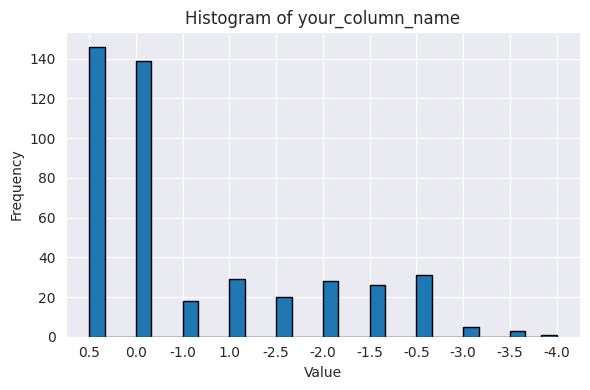

In [53]:
import matplotlib.pyplot as plt

# Replace 'your_column_name' with the actual column name
plt.figure(figsize=(6, 4))
plt.hist(y_train, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of your_column_name')
plt.tight_layout()
plt.show()

In [10]:
prism_df


,cell_line,ARV-825 (BRD:BRD-A00047421-001-01-7),RS-0481 (BRD:BRD-A00055058-001-01-0),8-BROMO-CGMP (BRD:BRD-A00077618-236-07-6),DOCUSATE (BRD:BRD-A00092689-236-04-9),NIFURTIMOX (BRD:BRD-A00100033-001-08-9),BALAGLITAZONE (BRD:BRD-A00147595-001-01-5),FLUTRIMAZOLE (BRD:BRD-A00218260-001-03-4),KBG (BRD:BRD-A00376169-001-01-6),OTENZEPAD (BRD:BRD-A00520476-001-07-4),...,TALC (BRD:BRD-M92352362-002-02-3),EFONIDIPINE-MONOETHANOLATE (BRD:BRD-M92675308-003-07-1),LASOFOXIFENE (BRD:BRD-M93148412-001-02-6),DICHLOROACETATE (BRD:BRD-M97302542-001-03-6),CEVIMELINE (BRD:BRD-M98279124-300-01-1),COLESEVALAM (BRD:BRD-U08520523-000-01-0),TYLOXAPOL (BRD:BRD-U25960968-000-01-9),SEVELAMER (BRD:BRD-U45393375-000-01-6),TYLOXAPOL (BRD:BRD-U48018661-000-01-9),PHOSPHATIDYLCHOLINE (BRD:BRD-U51753822-000-01-1)
0,ACH-000001,-1.207281,0.515743,-0.015577,-0.395123,-0.449332,0.489379,0.206675,0.27273,0.021036,...,-0.856546,0.266364,-0.435815,-0.148373,-0.308255,0.125641,-0.067407,0.448387,-0.194616,-0.200107
1,ACH-000002,-4.231563,NaN,NaN,-0.538376,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.535864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACH-000004,-3.860672,NaN,NaN,0.306971,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.787437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACH-000005,-2.271411,NaN,NaN,0.035096,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.180988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACH-000006,0.277833,NaN,NaN,-0.124899,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.651824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,ACH-002039,-2.314389,NaN,NaN,0.202935,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.295103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,ACH-002041,-2.805922,NaN,NaN,-0.335913,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.343104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,ACH-002042,-2.332483,NaN,NaN,-0.334916,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.886113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,ACH-002046,-3.441262,NaN,NaN,-0.343913,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.508481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
